In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

In [ ]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sys.path.append("/local/storage/ly349/projects/Deconvolution/Notebooks/")
from utils import get_bioqueue_job_info_ws

In [ ]:
eval_jobs = get_bioqueue_job_info_ws({"workspace": 144, "protocol": 317, "status": -1, "job_name": "LPC"})
len(eval_jobs)

110

In [ ]:
csc_result_dfs = []

for j in eval_jobs:
    try:
        # v0.2.0-PROcap-RWD12d16-LPC-eval
        _, _, configuration, _, _ = j["job_name"].split("-")
        ds_id = configuration[3:]
        if configuration.find("d") != -1:
            group = "Disease"
            items = ds_id.split("d")
            
            n_cell_types = int(items[0])
        else:
            group = "Normal"
            items = ds_id.split("n")
            n_cell_types = int(items[0])
    except Exception as e:
        print(j["job_name"], e)
        break
    
    res_df = pd.read_csv(os.path.join(j["run_dir"], str(j["user_id"]), j["result"], f"{j['job_name']}.csc.csv.gz"))
    log_res_df = res_df.loc[res_df.Transform=="log"].copy()
    log_res_df["Experiment ID"] = ds_id
    log_res_df["Num cell types"] = n_cell_types
    log_res_df["Sample type"] = group
    csc_result_dfs.append(log_res_df)
csc_result_df = pd.concat(csc_result_dfs, ignore_index=True)
csc_result_df.head()

,Model,Transform,Cluster,Corr coef,CCC,MSE,Experiment ID,Num cell types,Sample type
0,0,log,0,0.842438,0.695056,2.703047,5n1,5,Normal
1,0,log,1,0.749442,0.578652,3.157925,5n1,5,Normal
2,0,log,2,0.959979,0.954780,0.475094,5n1,5,Normal
3,0,log,3,0.854295,0.852060,1.408203,5n1,5,Normal
4,0,log,4,0.837940,0.776594,1.625862,5n1,5,Normal


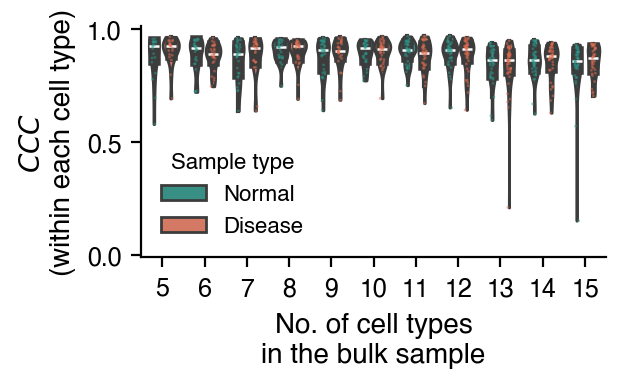

In [ ]:
x_var = "Num cell types"
y_var = "CCC"
plot_order = ("Normal", "Disease")

fig, ax = plt.subplots(1, 1, figsize=(3, 1.5))
palette = {"Normal": "#2a9d8f", "Disease": "#e76f51"}

sns.violinplot(
    x=x_var, y=y_var, data=csc_result_df, hue="Sample type",
    cut=0, palette=palette, ax=ax, linewidth=1, legend=True)
sns.stripplot(
    x=x_var, y=y_var, data=csc_result_df, hue="Sample type",
    dodge=True, s=1, alpha=0.5, legend=False, palette=palette, ax=ax
    )
ax.set_ylabel(r"$CCC$"+"\n(within each cell type)")
ax.set_xlabel("No. of cell types\nin the bulk sample")
sns.despine()

ax.set_ylim(-0.01, 1.01)

In [ ]:
crc_result_dfs = []

for j in eval_jobs:
    try:
        # v0.2.0-RWD12d16-PROcap-eval
        _, _, configuration, _, _ = j["job_name"].split("-")
        ds_id = configuration[3:]
        if configuration.find("d") != -1:
            group = "Disease"
            items = ds_id.split("d")
            
            n_cell_types = int(items[0])
        else:
            group = "Normal"
            items = ds_id.split("n")
            n_cell_types = int(items[0])
    except Exception as e:
        print(j["job_name"], e)
        break
    
    res_df = pd.read_csv(os.path.join(j["run_dir"], str(j["user_id"]), j["result"], f"{j['job_name']}.crc.csv.gz"))
    log_res_df = res_df.loc[res_df.Transform=="log"].copy()
    log_res_df["Experiment ID"] = ds_id
    log_res_df["Num cell types"] = n_cell_types
    log_res_df["Sample type"] = group
    crc_result_dfs.append(log_res_df)
crc_result_df = pd.concat(crc_result_dfs, ignore_index=True)
crc_result_df.head()

,Model,Region,Transform,Corr coef,CCC,MSE,Experiment ID,Num cell types,Sample type
0,0,chr1:8720-12816,log,-0.724632,-0.655065,4.780400,5n1,5,Normal
1,0,chr1:603461-607557,log,-0.250000,-0.250000,6.364797,5n1,5,Normal
2,0,chr1:627724-631820,log,0.014915,0.011230,9.098521,5n1,5,Normal
3,0,chr1:628112-632208,log,0.011705,0.008803,9.242184,5n1,5,Normal
4,0,chr1:628606-632702,log,-0.320100,-0.318114,3.500885,5n1,5,Normal


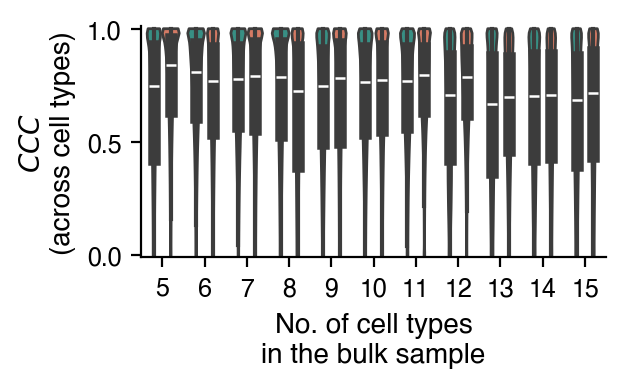

In [ ]:
x_var = "Num cell types"
y_var = "CCC"
plot_order = ("Normal", "Disease")

fig, ax = plt.subplots(1, 1, figsize=(3, 1.5))
palette = {"Normal": "#2a9d8f", "Disease": "#e76f51"}

sns.violinplot(
    x=x_var, y=y_var, data=crc_result_df, hue="Sample type",
    cut=0, palette=palette, ax=ax, linewidth=1, legend=False)
ax.set_ylabel(r"$CCC$"+"\n(across cell types)")
ax.set_xlabel("No. of cell types\nin the bulk sample")
ax.set_ylim((-0.01, 1.01))
sns.despine()